In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs #creates classification datasets 

In [5]:
data = make_blobs(n_samples=100,n_features=3,centers=2,random_state=101) #starting with 3 features (dimensions), try to reduce to 2

In [6]:
type(data)

tuple

In [7]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [9]:
data[1]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1])

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [14]:
scaled_data = scaler.fit_transform(data[0])

In [15]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [17]:
from mpl_toolkits.mplot3d import Axes3D #for 3D visualization

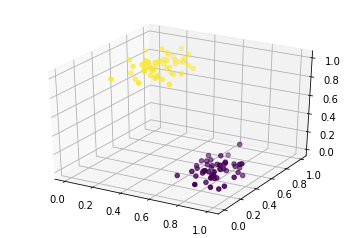

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

In [22]:
#now, try to recreate the graph using only 2 of the 3 features; succeed if the two classes remain highly separated

In [23]:
import tensorflow as tf

In [25]:
from tensorflow.contrib.layers import fully_connected

In [33]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs
learning_rate = 0.01

In [28]:
x = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [31]:
hidden = fully_connected(x,num_hidden,activation_fn=None)
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [32]:
loss = tf.reduce_mean(tf.square(outputs-x))

In [35]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [36]:
init = tf.global_variables_initializer()

In [38]:
num_steps = 1000

In [39]:
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_steps):
        sess.run(train,feed_dict={x:scaled_data})
    output_2d = hidden.eval(feed_dict={x:scaled_data})

In [40]:
output_2d #this is the 2d representation of the original 3d data

array([[-0.39219582,  0.66320801],
       [-0.37720409,  0.64286029],
       [ 0.59461153,  0.72237039],
       [-0.27491936,  0.77145374],
       [ 0.76708877,  0.86645865],
       [-0.49110869,  0.69401002],
       [-0.47814822,  0.6115098 ],
       [-0.43491659,  0.78252912],
       [ 0.77168083,  0.88462245],
       [ 0.67897236,  0.71747911],
       [ 0.62999463,  0.65866101],
       [-0.34104088,  0.86286902],
       [-0.19559176,  0.70914841],
       [-0.33073059,  0.64026558],
       [-0.30011106,  0.56051707],
       [-0.14886297,  0.71067619],
       [-0.28182361,  0.72807395],
       [ 0.65454376,  0.77217937],
       [-0.31920505,  0.8476789 ],
       [-0.26490301,  0.74465287],
       [-0.2532427 ,  0.78404677],
       [ 0.76154715,  0.84611428],
       [-0.26202193,  0.72955525],
       [-0.31547666,  0.72906935],
       [ 0.54396826,  0.44501987],
       [ 0.68050426,  0.7997117 ],
       [-0.49771997,  0.65084028],
       [ 0.55153334,  0.68182111],
       [ 0.56239915,

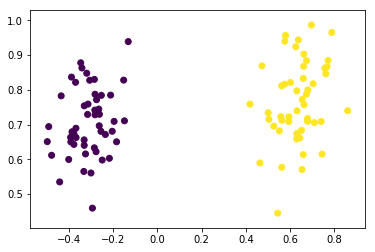

In [44]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])

In [45]:
#since the two classes are still separated with 2 dimensions as they were with 3 dimensions, 
#the dimensionality reduction was successful 